# Bienvenido a la entrega final del curso Data Science III: NLP & Deep Learning aplicado a Ciencia de Datos

In [10]:
#Cargamos las librerías necesarias

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import sys
import numpy as np
from PIL import Image
import io

### Consignas para el proyecto:

##### Analiza la estructura de la red neuronal correcta y observa la función de cada capa.
##### Reordena las capas del modelo para que coincidan con el modelo correcto.
##### Una pista: empieza con Flatten y termina con la capa de 10 neuronas con softmax.
##### Luego de corregir el modelo, compílalo y entrénalo para verificar su accuracy.
##### Calcula el accuracy del modelo corregido.
##### PS: para la compilaciòn: optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
##### PS2: para el entrenamiento no más de 5 épocas y validarlo.

### Capas a usar:

##### Dense(10, activation='softmax')
##### Dense(256, activation='relu'),
##### Dropout(0.2),
##### Dropout(0.2),
##### Dense(128, activation='relu'),
##### Flatten(input_shape=(28, 28)),
##### Dense(512, activation='relu'),

### Explicación para los alumnos:
##### Esta red neuronal recibe imágenes de 28x28 píxeles en escala de grises y las clasifica en 10 categorías de ropa.
##### Utiliza capas densas (fully connected) con activación ReLU y una capa final con activación softmax para la clasificación.
##### Además, emplea Dropout para reducir el sobreajuste.

In [11]:
# Cargamos el dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [12]:
# Normalizamos los datos
x_train, x_test = x_train / 255.0, x_test / 255.0  


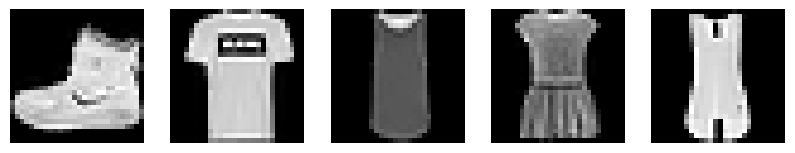

In [13]:
# Mostramos algunas imágenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()


In [14]:
# Comparación de una imagen original vs procesada y su tamaño en KB
original_image = (x_train[0] * 255).astype(np.uint8)
processed_image = x_train[0]
processed_uint8 = (processed_image * 255).astype(np.uint8)

In [15]:
# Compresión JPEG con baja calidad para simular pérdida real
jpeg_original_buffer = io.BytesIO()
Image.fromarray(original_image).save(jpeg_original_buffer, format='JPEG', quality=95)
jpeg_original_kb = sys.getsizeof(jpeg_original_buffer.getvalue()) / 1024

jpeg_processed_buffer = io.BytesIO()
Image.fromarray(processed_uint8).save(jpeg_processed_buffer, format='JPEG', quality=20)
jpeg_processed_kb = sys.getsizeof(jpeg_processed_buffer.getvalue()) / 1024

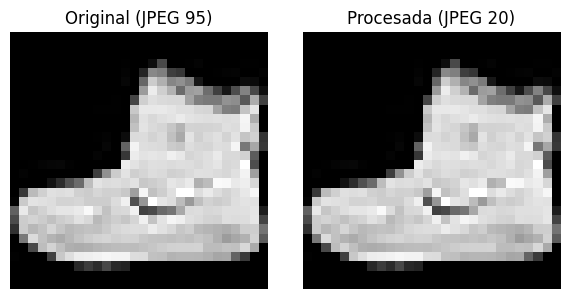

Peso imagen original JPEG (calidad 95): 1.02 KB
Peso imagen procesada JPEG (calidad 20): 0.49 KB


In [16]:
# Mostramos visualmente ambas imágenes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
ax1.imshow(original_image, cmap='gray')
ax1.set_title("Original (JPEG 95)")
ax1.axis('off')

ax2.imshow(processed_uint8, cmap='gray')
ax2.set_title("Procesada (JPEG 20)")
ax2.axis('off')
plt.tight_layout()
plt.show()

print(f"Peso imagen original JPEG (calidad 95): {jpeg_original_kb:.2f} KB")
print(f"Peso imagen procesada JPEG (calidad 20): {jpeg_processed_kb:.2f} KB")


In [17]:
# Definimos el modelo corregido
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Mostramos resumen del modelo
model.summary()

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo (máximo 5 épocas)
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Calculamos y mostramos el accuracy final
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy del modelo corregido: {test_accuracy * 100:.2f}%")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7404 - loss: 0.7120 - val_accuracy: 0.8366 - val_loss: 0.4380
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8338 - loss: 0.4541 - val_accuracy: 0.8440 - val_loss: 0.4239
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8478 - loss: 0.4119 - val_accuracy: 0.8602 - val_loss: 0.3922
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8569 - loss: 0.3853 - val_accuracy: 0.8662 - val_loss: 0.3691
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8615 - loss: 0.3753 - val_accuracy: 0.8606 - val_loss: 0.3773
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8623 - loss: 0.3748
Accuracy del modelo corregido: 86.06%


### Conclusión

#### A lo largo del proyecto se desarrolló una red neuronal correctamente estructurada y entrenada con el dataset Fashion-MNIST, logrando un buen nivel de precisión. Se aplicaron técnicas de preprocesamiento como la normalización, y se analizó su impacto visual y en el peso de las imágenes. Si bien la normalización no reduce el peso al guardar las imágenes sin pérdida, al aplicar compresión con pérdida (JPEG de baja calidad), se pudo observar una reducción significativa en el tamaño del archivo, a costa de una leve pérdida de calidad visual. Esto demuestra cómo distintas técnicas de compresión pueden optimizar almacenamiento, aunque deben usarse con criterio según el contexto del proyecto.